In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import random
import os

In [ ]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datamunge/sign-language-mnist")

print("Path to dataset files:", path)

100%|██████████| 62.6M/62.6M [00:01<00:00, 60.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/datamunge/sign-language-mnist/versions/1


In [ ]:
print(os.listdir(path))

['sign_mnist_test', 'sign_mnist_train.csv', 'amer_sign3.png', 'sign_mnist_train', 'amer_sign2.png', 'american_sign_language.PNG', 'sign_mnist_test.csv']


In [ ]:
# Instead of trying to list the contents of the CSV file,
# you should read it using pandas' read_csv function.
df_train = pd.read_csv(path + "/sign_mnist_train.csv")
#print(df_train.head()) # Print the first few rows to verify the data is loaded

In [ ]:

df_test = pd.read_csv(path + "/sign_mnist_test.csv")
#print(df_test.head())

In [ ]:
xTrain = df_train.drop('label', axis=1).values.reshape(-1, 28, 28, 1)
xTest = df_test.drop('label', axis=1).values.reshape(-1, 28, 28, 1)
xTrain = xTrain / 255.0
xTest = xTest / 255.0

yTrain = pd.get_dummies(df_train['label']).values
yTest = pd.get_dummies(df_test['label']).values

print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(27455, 28, 28, 1)
(27455, 24)
(7172, 28, 28, 1)
(7172, 24)


In [ ]:
dataAugment = ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
)

In [ ]:
xTrain, xVal, yTrain, yVal = train_test_split(
    xTrain,
    yTrain,
    test_size=0.2,
    random_state=42,
)

In [ ]:
print(xTrain.shape)
print(yTrain.shape)
print(xVal.shape)
print(yVal.shape)

(21964, 28, 28, 1)
(21964, 24)
(5491, 28, 28, 1)
(5491, 24)


In [ ]:
# Define the model
model = tf.keras.models.Sequential([
    # Input Layer
    tf.keras.layers.Input(shape=(28, 28, 1)),

    # Convolutional Block 1
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    # Convolutional Block 2
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(strides=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    # Classification Block
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(24, activation='softmax')
])


# Compile Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,606,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │          12,312 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,723,192 (6.57 MB)

 Trainable params: 1,721,784 (6.57 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [ ]:
train_generator = dataAugment.flow(xTrain, yTrain, batch_size=32)
validation_generator = dataAugment.flow(xVal, yVal, batch_size=32)




Epoch 1/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 155s 225ms/step - acc: 0.9997 - loss: 9.3784e-04 - val_acc: 1.0000 - val_loss: 2.7689e-06 - learning_rate: 1.2500e-04
Epoch 2/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 202s 225ms/step - acc: 0.9998 - loss: 5.4800e-04 - val_acc: 1.0000 - val_loss: 2.7325e-06 - learning_rate: 1.2500e-04
Epoch 3/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 203s 226ms/step - acc: 0.9998 - loss: 6.4228e-04 - val_acc: 1.0000 - val_loss: 2.1643e-05 - learning_rate: 1.2500e-04
Epoch 4/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 200s 224ms/step - acc: 0.9997 - loss: 7.6895e-04 - val_acc: 1.0000 - val_loss: 1.4141e-05 - learning_rate: 1.2500e-04
Epoch 5/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 202s 223ms/step - acc: 0.9998 - loss: 4.3069e-04 - val_acc: 1.0000 - val_loss: 1.4056e-06 - learning_rate: 1.2500e-04
Epoch 6/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 156s 227ms/step - acc: 0.9999 - loss: 6.8166e-04 - val_acc: 1.0000 - val_loss: 5.6356e-07 - learning_rate: 1.2500e-04
Epoch 7/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 202s 227ms/s

In [ ]:
import os
import cv2
import numpy as np
from PIL import Image  # Importation de PIL pour un redimensionnement plus rapide.

In [ ]:
model.evaluate(xTest, yTest)

225/225 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - acc: 1.0000 - loss: 6.3439e-07


[8.119012591123465e-07, 1.0]

In [ ]:
model.save('/content/drive/MyDrive/Models/hs1.h5', overwrite=True, include_optimizer=True)

In [ ]:
from sklearn.metrics import accuracy_score

y_preds = model.predict(xTest)
max_indices = np.argmax(y_preds, axis=1)
y_preds_bool = np.zeros_like(y_preds, dtype=bool)
y_preds_bool[np.arange(y_preds.shape[0]), max_indices] = True

accuracy = accuracy_score(yTest, y_preds_bool)
print(f"Model Accuracy: {accuracy*100:.20f}%")


225/225 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step
Model Accuracy: 100.00000000000000000000%


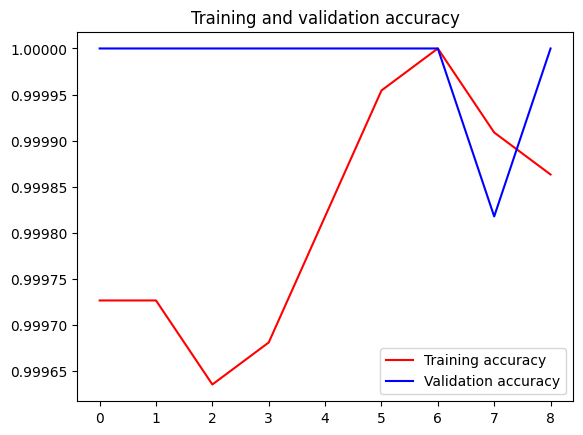

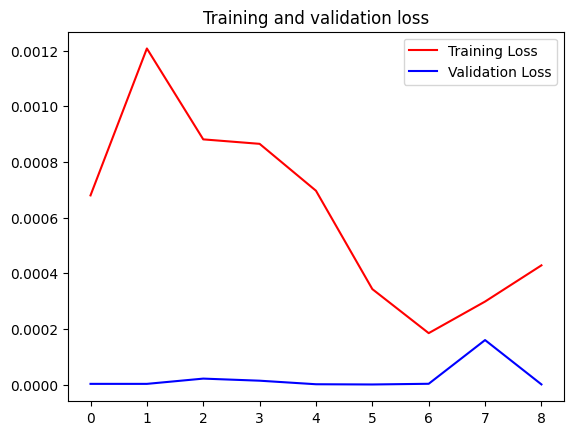

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━

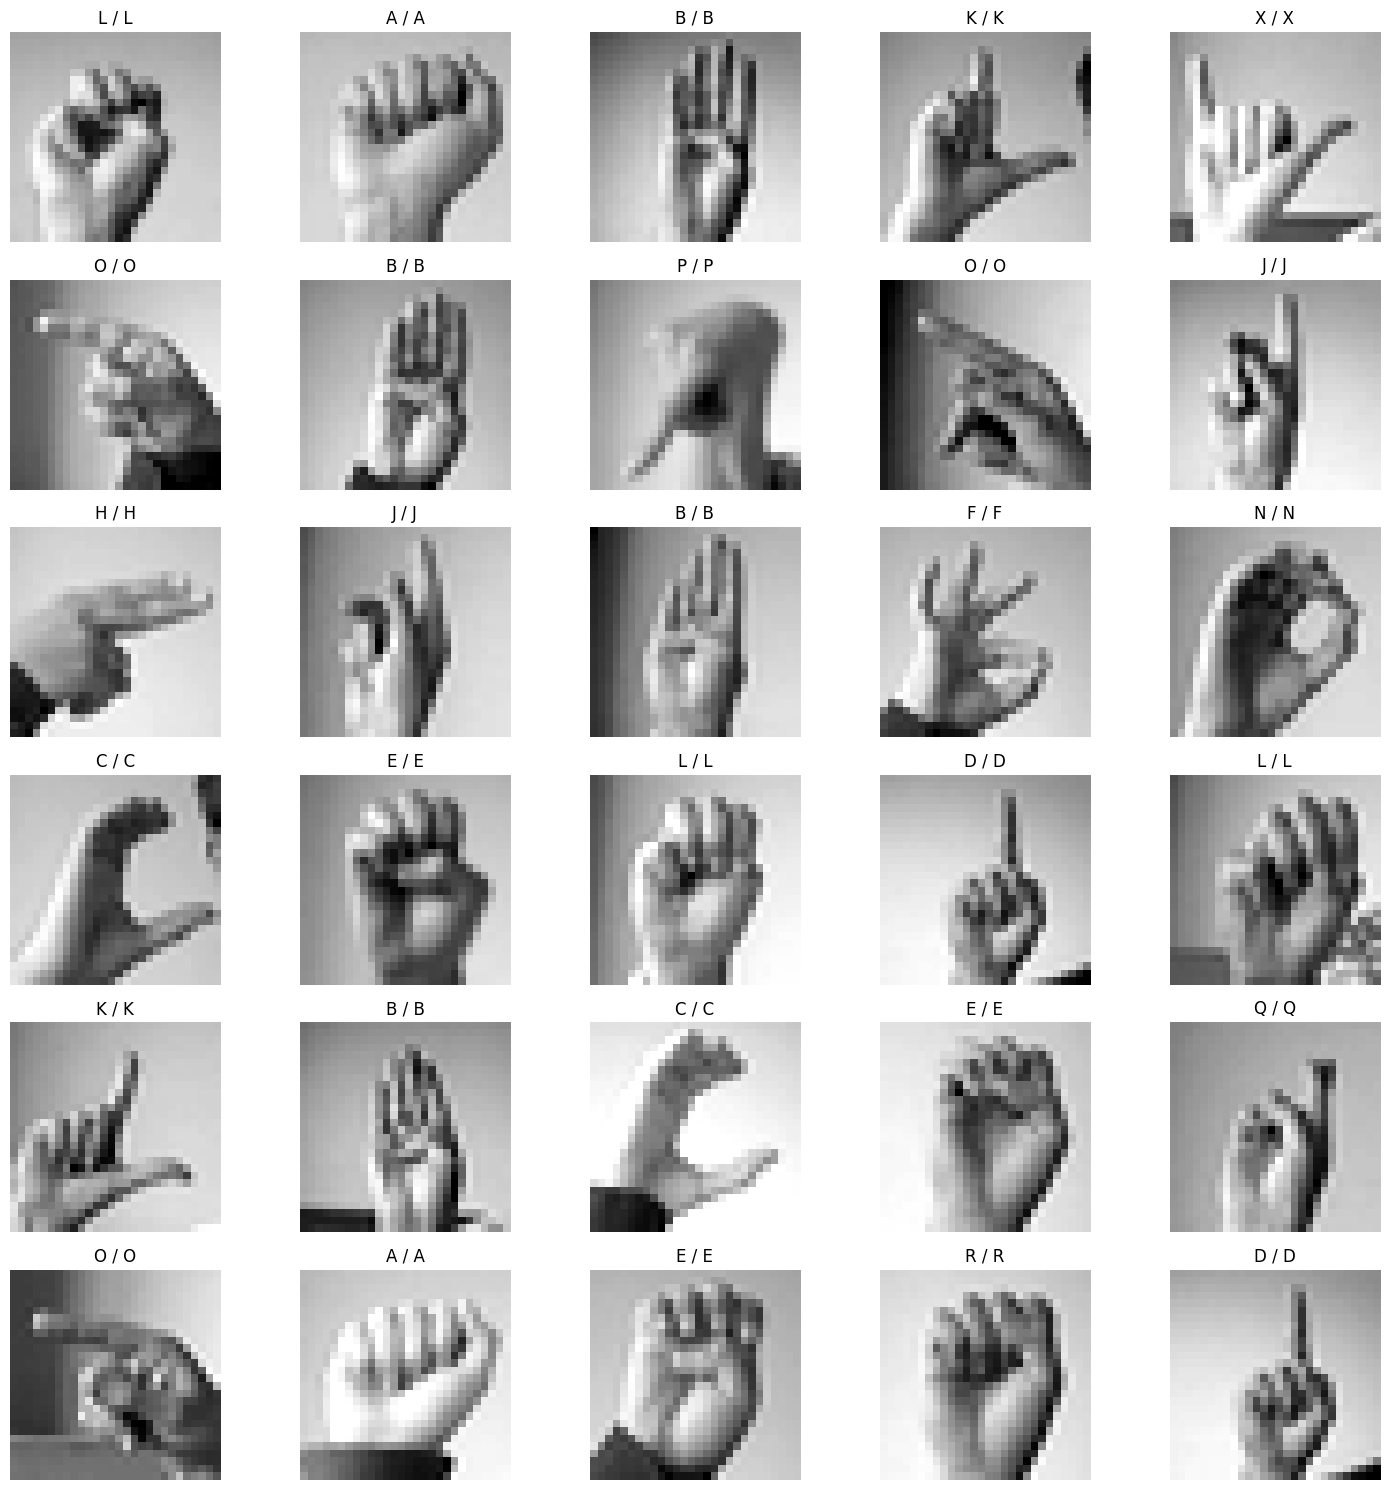

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

def visualize_predictions(images, labels, model, num_samples=30):
    num_samples = min(num_samples, len(images))

    random_indices = random.sample(range(len(images)), num_samples)

    plt.figure(figsize=(15, 15))
    for i, idx in enumerate(random_indices):
        image = images[idx]
        true_label = int(labels[idx])

        image_reshaped = np.expand_dims(image, axis=0)
        prediction = model.predict(image_reshaped)
        predicted_label = np.argmax(prediction)

        plt.subplot(6, 5, i + 1)
        plt.imshow(image.squeeze(), cmap='gray')
        plt.title(f"{chr(true_label + 65)} / {chr(predicted_label + 65)}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

testing_labels = np.argmax(yTest, axis=1)
visualize_predictions(xTest, testing_labels, model)